In [2]:
%load_ext autoreload
%autoreload 2

# Picturing vectors in three-dimensional space

## 3D Drawing in Python

In [3]:
from draw3d import *

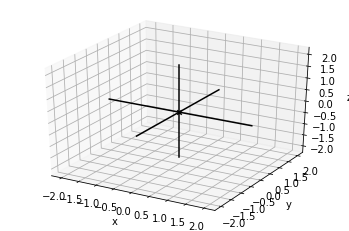

In [4]:
draw3d()

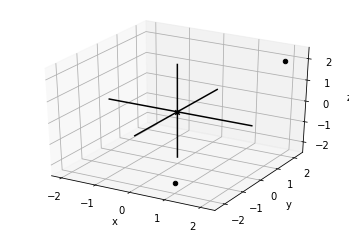

In [5]:
draw3d(
    Points3D((2,2,2),(1,-2,-2))
)

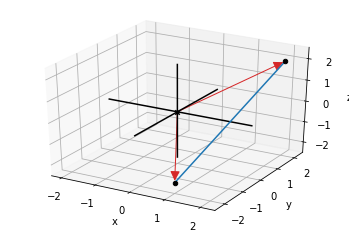

In [6]:
draw3d(
    Points3D((2,2,2),(1,-2,-2)),
    Arrow3D((2,2,2)),
    Arrow3D((1,-2,-2)),
    Segment3D((2,2,2), (1,-2,-2))
)

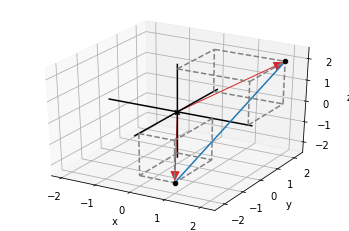

In [7]:
draw3d(
    Points3D((2,2,2),(1,-2,-2)),
    Arrow3D((2,2,2)),
    Arrow3D((1,-2,-2)),
    Segment3D((2,2,2), (1,-2,-2)),
    Box3D(2,2,2),
    Box3D(1,-2,-2)
)

**Exercise:** Draw the 3D arrow and point representing the coordinates $(-1,-2,2)$, as well as the dashed box that makes the arrow look 3D.  Do this drawing by hand as practice, but from now on we’ll use Python to draw for us.

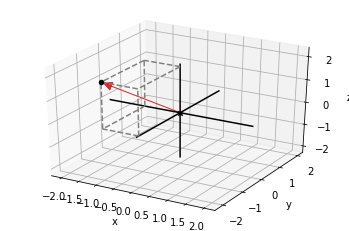

In [8]:
v = (-1,-2,2)

draw3d(
    Points3D(v),
    Arrow3D(v),
    Box3D(*v)
)

**Mini project:** There are eight 3D vectors that have every coordinate equal to $+1$ or $-1$.  For instance, $(1,-1,1)$ is one of them.  Plot all of these eight vectors as points.  Then, figure out how to connect them with line segments (using `Segment3D` objects) to form the outline of a cube.  Hint: you’ll need 12 segments in total.

In [9]:
pm1 = [1,-1]

In [10]:
vertices = [(x,y,z) for x in pm1 for y in pm1 for z in pm1]

In [11]:
edges = [((-1,y,z),(1,y,z)) for y in pm1 for z in pm1] +\
                [((x,-1,z),(x,1,z)) for x in pm1 for z in pm1] +\
                [((x,y,-1),(x,y,1)) for x in pm1 for y in pm1]

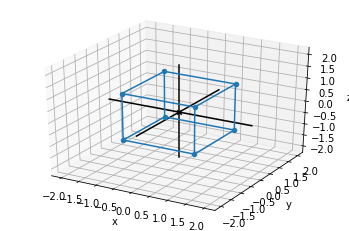

In [12]:
draw3d(
    Points3D(*vertices,color=blue),
    *[Segment3D(*edge) for edge in edges]
)

In [13]:
s = [1,-1]

for i,x in enumerate(s):
    print(f'x: iter: {i}, value: {x}')
    for j,y in enumerate(s):
        print(f'y: iter: {j}, value: {y}')
        for k,z in enumerate(s):
            print(f'z: iter: {k}, value: {z}')


x: iter: 0, value: 1
y: iter: 0, value: 1
z: iter: 0, value: 1
z: iter: 1, value: -1
y: iter: 1, value: -1
z: iter: 0, value: 1
z: iter: 1, value: -1
x: iter: 1, value: -1
y: iter: 0, value: 1
z: iter: 0, value: 1
z: iter: 1, value: -1
y: iter: 1, value: -1
z: iter: 0, value: 1
z: iter: 1, value: -1


In [14]:
pm1 = [1,-1]
vertices = [(x,y,z) for x in pm1 for y in pm1 for z in pm1]
vertices

[(1, 1, 1),
 (1, 1, -1),
 (1, -1, 1),
 (1, -1, -1),
 (-1, 1, 1),
 (-1, 1, -1),
 (-1, -1, 1),
 (-1, -1, -1)]

In [15]:
edges = [((-1,y,z),(1,y,z)) for y in pm1 for z in pm1]
edges

[((-1, 1, 1), (1, 1, 1)),
 ((-1, 1, -1), (1, 1, -1)),
 ((-1, -1, 1), (1, -1, 1)),
 ((-1, -1, -1), (1, -1, -1))]

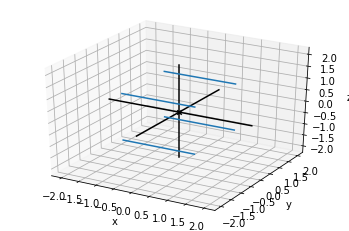

In [16]:
draw3d(
    *[Segment3D(*edge) for edge in edges]
)

In [17]:
edges = [((-1,y,z),(1,y,z)) for y in pm1 for z in pm1] +\
                [((x,-1,z),(x,1,z)) for x in pm1 for z in pm1] +\
                [((x,y,-1),(x,y,1)) for x in pm1 for y in pm1]

In [18]:
edges

[((-1, 1, 1), (1, 1, 1)),
 ((-1, 1, -1), (1, 1, -1)),
 ((-1, -1, 1), (1, -1, 1)),
 ((-1, -1, -1), (1, -1, -1)),
 ((1, -1, 1), (1, 1, 1)),
 ((1, -1, -1), (1, 1, -1)),
 ((-1, -1, 1), (-1, 1, 1)),
 ((-1, -1, -1), (-1, 1, -1)),
 ((1, 1, -1), (1, 1, 1)),
 ((1, -1, -1), (1, -1, 1)),
 ((-1, 1, -1), (-1, 1, 1)),
 ((-1, -1, -1), (-1, -1, 1))]

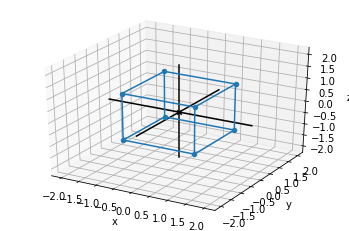

In [19]:
draw3d(
    Points3D(*vertices,color=blue),
    *[Segment3D(*edge) for edge in edges]
)

# Vector arithmetic in 3D

## Adding 3D vectors

In [20]:
list(zip(*[(1,1,3),(2,4,-4),(4,2,-2)]))
#list(zip((1,1,3),(2,4,-4),(4,2,-2)))


[(1, 2, 4), (1, 4, 2), (3, -4, -2)]

In [21]:
def add(*vectors):
    return tuple([sum(coord) for coord in zip(*vectors)])

In [22]:
add((1,1,3),(2,4,-4),(4,2,-2))

(7, 7, -3)

In [23]:
l = [(1,1,3),(2,4,-4),(4,2,-2)]

add(*l)

(7, 7, -3)

In [24]:
def add(*vectors):
    return tuple(map(sum,zip(*vectors)))    

In [25]:
add((1,1,3),(2,4,-4),(4,2,-2))

(7, 7, -3)

In [26]:
l = [(1,1,3),(2,4,-4),(4,2,-2)]

add(*l)

(7, 7, -3)

## Scalar multiplication in 3D

In [27]:
def scale(scalar, vector):
    return tuple([scalar * component for component in vector])

In [28]:
v = (3,5,6)
scale(5,v)

(15, 25, 30)

## Subtracting 3D vectors

In [29]:
from functools import reduce
def subtract(v1, v2):
    return tuple([reduce(lambda x,y: x-y, component) for component in zip(v1,v2)])

In [30]:
u = (6,7,8)
v = (1,2,3)

subtract(u,v)

(5, 5, 5)

## Computing lengths and distances

In [31]:
from math import sqrt

In [32]:
def length(vector):
    return sqrt(sum([component ** 2 for component in vector]))

In [33]:
length((3,4,12))

13.0

## Computing angles and directions

The length of the vector, labeled r, along with the angles ϕ and θ can describe any vector in three dimensions. Together, the three numbers r, ϕ, and θ are called spherical coordinates as opposed to the Cartesian coordinates x, y, and z.

## Exercises

**Exercise:** Draw $(4,0,3)$ and $(-1,0,1)$ as Arrow3D objects, such that they are placed tip-to-tail in both orders in 3D.  What is their vector sum?

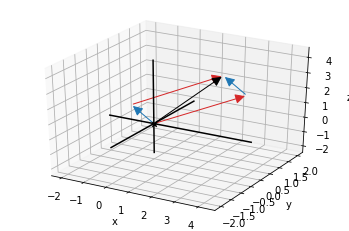

In [34]:
u = (4,0,3)
v = (-1,0,1)

draw3d(
    Arrow3D(u, color=red),
    Arrow3D(v, color=blue),
    Arrow3D(add(u,v), u, color=blue),
    Arrow3D(add(u,v), v, color=red),
    Arrow3D(add(u,v), color=black),
    )

**Exercise:** Suppose we set `vectors1=[(1,2,3,4,5), (6,7,8,9,10)]` and `vectors2=[(1,2), (3,4), (5,6)]`.  Without evaluating in Python, what are the results of `len(zip(*vectors1))` and `len(zip(*vectors2))`?

**Solution:** 5 and 2

In [35]:
vectors1=[(1,2,3,4,5), (6,7,8,9,10)]
vectors2=[(1,2), (3,4), (5,6)]

In [36]:
len(list(zip(*vectors1)))

5

In [37]:
len(list(zip(*vectors2)))

2

**Mini project:** The comprehension below creates a list of 24 Python vectors
```
from math import sin, cos, pi
vs = [(sin(pi*t/6), cos(pi*t/6), 1.0/3) for t in range(0,24)]
```
What is the sum of the 24 vectors?  Draw all 24 of them tip-to-tail as Arrow3D objects.

In [38]:
from math import sin, cos, pi
vs = [(sin(pi*t/6), cos(pi*t/6), 1.0/3) for t in range(0,24)]


In [39]:
add(*vs)

(-4.440892098500626e-16, -7.771561172376096e-16, 7.9999999999999964)

(-4.440892098500626e-16, -7.771561172376096e-16, 7.9999999999999964)


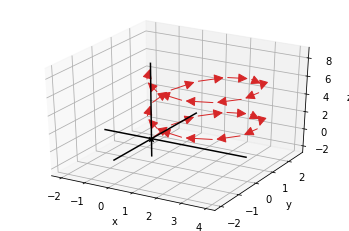

In [40]:
current_sum = (0,0,0)
arrows = []

for v in vs:
    next_sum = add(current_sum, v)
    arrows.append(Arrow3D(next_sum, current_sum))
    current_sum = next_sum

print(current_sum)
draw3d(*arrows)

**Exercise:** Write a function `scale(scalar,vector)` that returns the input scalar times the input vector.  Specifically, write it so it works on 2D or 3D vectors, or vectors of any number of coordinates.

In [41]:
def scale(scalar, vector):
    return tuple([scalar * component for component in vector])

In [42]:
v = (3,5,6)
scale(5,v)

(15, 25, 30)

**Mini project:** The coordinates 3, 4, 12 in any order create a vector of length 13, a whole number. This is unusual because most numbers are not perfect squares, so the square root in the length formula typically returns an irrational number.  Find a different triple of whole numbers that define coordinates of a vector with whole number length.

In [43]:
length((3,4,12))

13.0

In [44]:
def vectors_with_whole_number_length():
    for i in range(0,100):
        for j in range(0,100):
            for k in range(0,100):
                if length((i,j,k)).is_integer():
                    yield (i,j,k)


In [45]:
l = list(vectors_with_whole_number_length())
l[-10:]

[(99, 52, 72),
 (99, 54, 38),
 (99, 66, 2),
 (99, 66, 22),
 (99, 70, 90),
 (99, 72, 12),
 (99, 72, 52),
 (99, 88, 12),
 (99, 90, 18),
 (99, 90, 70)]

In [46]:
length((99, 70, 90))

151.0

In [47]:
len(l)

5485

In [48]:
def vectors_with_whole_number_length(max_coord=100):
    for x in range(0,max_coord):
        for y in range(0,x+1):
            for z in range(0,y+1):
                if length((x,y,z)).is_integer():
                    yield (x,y,z)

In [49]:
l = list(vectors_with_whole_number_length())
l[-10:]

[(99, 36, 28),
 (99, 44, 12),
 (99, 54, 38),
 (99, 66, 2),
 (99, 66, 22),
 (99, 72, 12),
 (99, 72, 52),
 (99, 88, 12),
 (99, 90, 18),
 (99, 90, 70)]

In [50]:
len(l)

1031

**Exercise:** Find a vector in the same direction as $(-1,-1,2)$ but which has length 1.  Hint: find the appropriate scalar to multiply the original vector to change its length appropriately.

In [51]:
v = (-1,-1,2)
length(v)

2.449489742783178

In [52]:
## s * length(v) = 1
s = 1/length(v)
scale(s,v)
(-0.4082482904638631, -0.4082482904638631, 0.8164965809277261)


(-0.4082482904638631, -0.4082482904638631, 0.8164965809277261)

In [53]:
length(scale(s,(-1,-1,2)))

1.0

In [54]:
tuple([component/length(v) for component in v])

(-0.4082482904638631, -0.4082482904638631, 0.8164965809277261)

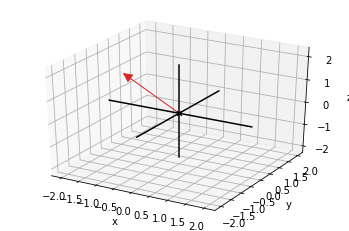

In [55]:
draw3d(
    Arrow3D(v)
)

# The dot product: measuring alignment of vectors

## Computing the dot product

In [56]:
def dot(u,v):
    return sum([coord1 * coord2 for coord1,coord2 in zip(u,v)])

## Dot products by example

In [57]:
u = (1,0)
v = (0,2)

In [58]:
list(zip(u,v))

[(1, 0), (0, 2)]

In [59]:
dot((1,0),(0,2))

0

In [60]:
dot((0,3,0),(0,0,-5))

0

In [61]:
dot((3,4),(2,3))

18

In [62]:
dot(scale(2,(3,4)),(2,3))

36

In [63]:
dot((3,4),scale(2,(2,3)))

36

In [64]:
length((4,3)) * length((8,6))

50.0

In [65]:
dot((4,3),(8,6))

50

## Measuring angles with the dot product

In [66]:
from math import sin, cos, pi, acos

In [67]:
3 * 2 * cos(75 * pi / 180)

1.5529142706151244

In [68]:
def angle_between(v1,v2):
    return acos(dot(v1,v2) / (length(v1) * length(v2)))

**Mini project:** Find a vector $\vec{u}$ of length 3 and a vector $\vec{v}$ of length 7, such that $\vec{u} \cdot \vec{v} = 21$.  Find another pair of vectors $\vec{u}$ and $\vec{v}$ such that $\vec{u} \cdot \vec{v} = -21$.  Finally, find three more pairs of vectors of respective lengths 3 and 7 and show that all of their lengths lie between -21 and 21.

In [69]:
dot((3,0), (7,0))

21

In [70]:
dot((-3,0), (7,0))

-21

In [71]:
from vectors import to_cartesian
from random import random
from math import pi

def random_vector_of_length(l):
    return to_cartesian((l, 2*pi*random()))

pairs = [(random_vector_of_length(3), random_vector_of_length(7)) for i in range(0,3)]

for u,v in pairs:
    print(f'u={u}, v={v}')
    print(f'length(u) = {length(u)}, length(v) = {length(v)}, dot(u,v) = {dot(u,v)}')



u=(-2.9782086605000337, 0.3609337536482214), v=(-5.367093305336871, -4.4938079010799)
length(u) = 3.0, length(v) = 6.999999999999999, dot(u,v) = 14.362356809755218
u=(1.0761269272605578, -2.8003483419790385), v=(2.98464363466536, -6.331816672492307)
length(u) = 3.0, length(v) = 7.0, dot(u,v) = 20.943147704069283
u=(2.52216900250335, -1.6243963564386794), v=(4.621887733050467, -5.257200184801565)
length(u) = 3.0, length(v) = 6.999999999999999, dot(u,v) = 20.19695879861078


**Exercise:** Let $\vec{u}$ and $\vec{v}$ be vectors, with $|\vec{u}| = 3.61$ and $|\vec{v}| = 1.44$.  If the angle between $\vec{u}$ and $\vec{v}$ is 101.3 degrees, what is $\vec{u} ∙ \vec{v}$?

In [72]:
u = 3.61
v = 1.44
tetha = 101.3
uv = u * v * cos(tetha * pi/180)
uv

-1.0186064362303022

**Mini Project:** Find the angle between $(3,4)$ and $(4,3)$ by converting them to polar coordinates and taking the difference of the angles.  

In [73]:
from vectors import to_polar 

In [74]:
_,alpha = to_polar((4,3))
_,beta = to_polar((3,4))

beta - alpha

0.2837941092083278

In [75]:
angle_between((4,3),(3,4))

0.283794109208328

In [76]:
dot((1,1,0),(-0.9,1,0))

0.09999999999999998

# The cross product: measuring oriented area

## Computing the cross product of 3D vectors

In [77]:
def cross(u, v):
    ux,uy,uz = u
    vx,vy,vz = v
    return (uy*vz - uz*vy, uz*vx - ux*vz, ux*vy - uy*vx)

In [78]:
cross((0,0,1),(1,2,3))

(-2, 1, 0)

In [79]:
cross((0,0,1),(-1,-1,0))

(1, -1, 0)

In [80]:
 cross((0,0,1),(1,-1,5))

(1, 1, 0)

# Rendering a 3D object in 2D

## Defining a 3D object with vectors

In [81]:
octahedron = [
    [(1,0,0), (0,1,0), (0,0,1)],
    [(1,0,0), (0,0,-1), (0,1,0)],
    [(1,0,0), (0,0,1), (0,-1,0)],
    [(1,0,0), (0,-1,0), (0,0,-1)],
    [(-1,0,0), (0,0,1), (0,1,0)],
    [(-1,0,0), (0,1,0), (0,0,-1)],
    [(-1,0,0), (0,-1,0), (0,0,1)],
    [(-1,0,0), (0,0,-1), (0,-1,0)],
]

In [82]:
def vertices(faces):
    return list(set([vertex for face in faces for vertex in face]))

In [83]:
def component(v,direction):
    return (dot(v,direction) / length(direction))

In [84]:
def vector_to_2d(v):
    return (component(v,(1,0,0)), component(v,(0,1,0)))

In [85]:
def face_to_2d(face):
    return [vector_to_2d(vertex) for vertex in face]

In [86]:
blues = matplotlib.cm.get_cmap('Blues')

In [87]:
def unit(v):
    return scale(1./length(v), v)

In [88]:
def normal(face):
    return(cross(subtract(face[1], face[0]), subtract(face[2], face[0])))

In [89]:
from vectors import *
from draw2d import *

In [90]:
def render(faces, light=(1,2,3), color_map=blues, lines=None):
    polygons = []
    for face in faces:
        unit_normal = unit(normal(face))
        if unit_normal[2] > 0:
            c = color_map(1 - dot(unit(normal(face)), unit(light)))
            p = Polygon2D(*face_to_2d(face), fill=c, color=lines)
            polygons.append(p)
    draw2d(*polygons,axes=False, origin=False, grid=None)
#1 For each face, compute a vector of length 1 perpendicular to it.
#2 Only proceed if the z-component of this vector is positive, or in other words if it points toward the viewer.
#3 The larger the dot product between the normal vector and the light source vector, the less shading.

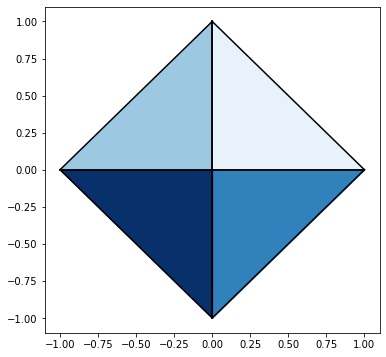

In [91]:
render(octahedron, color_map=blues, lines=black)

In [92]:
def subtract(v1,v2):
    return tuple(v1-v2 for (v1,v2) in zip(v1,v2))

In [93]:
u = (1,0,0)
v = (0,1,0)

tuple([(component_v1 - component_v2) for (component_v1, component_v2) in zip(u,v)])

(1, -1, 0)

In [94]:
right = (1,1,1)
up = (-1,-1,1)

v = (5,5,5)

In [95]:
component(v, right)

8.660254037844387

In [96]:
component(v, up)

-2.886751345948129

In [97]:
def split(face):
    midpoints = [unit(add(face[i], face[(i+1)%len(face)])) for i in range(0,len(face))]
    triangles = [(face[i], midpoints[i], midpoints[(i-1)%len(face)]) for i in range(0,len(face))]
    return [midpoints] + triangles

def rec_split(faces, depth=0):
    if depth == 0:
        return faces
    else:
        return rec_split([new_face for face in faces for new_face in split(face)], depth-1)

# NICE SPHERE!
def sphere_approx(n):
    return rec_split(octahedron,n)

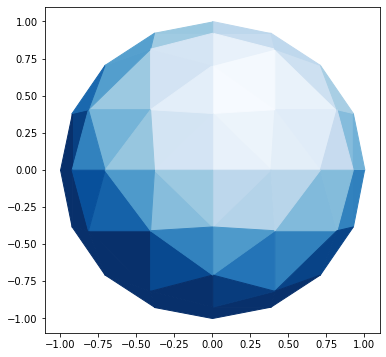

In [98]:
render(sphere_approx(2), lines=None)

## My approach for 3d to 2d rendering

* List of faces 
* List of vertices
* Projecting vertices to camera plane
* Calculating face normal
* Backface culling
* Light intensity calculation
* Camera plane location -- right and up  vector
* Light position and intensity

In [99]:
def get_vertices(geometry):
    return list(set([vertex for face in geometry for vertex in face]))

In [100]:
def vector_to_axis(vector, axis):
    '''Project 3d vector to axis'''
    return dot(vector,axis) / length(axis)

In [101]:
def vector_to_plane(vector, plane):
    '''Project 3d vector on to the plane'''
    u,v = plane
    return (vector_to_axis(vector,u), vector_to_axis(vector, v))

In [102]:
def normal(face):
    '''Calculate face normal vector'''
    return cross(subtract(face[1], face[0]), subtract(face[2], face[0]))

In [103]:
def normalize(vector):
    '''Normalize vector'''
    return tuple([component/length(vector) for component in vector])

In [104]:
def light_intensity(vector, light):
    '''Calculate light intensity for given point(vector)'''
    light_position,light_intensity = light
    angle = dot(normalize(vector), normalize(light_position))
    #intensity = light_intensity * 1/length(subtract())**2
    return angle

In [105]:
def backface(vector, camera_center):
    '''Checks if face is visible to camera'''
    pass

In [106]:
blues = matplotlib.cm.get_cmap('Blues')

In [107]:
def render(geometry, camera, light, color_map=blues, lines=None):
    polygons =[]
    for face in geometry:
        face_normal = normalize(normal(face))
        if face_normal[2] < 0:
            intensity = color_map(1 - light_intensity(face_normal, light))
            face2d = [vector_to_plane(vertex, camera) for vertex in face]
            polygons.append(Polygon2D(*face2d, fill=intensity, color=lines))

    draw2d(*polygons,axes=False, origin=False, grid=None)

In [108]:
# object faces
octahedron

# camera plane location
camera1 = ((1,0,0), (0,1,0))

# light location and intensity
light1 = ((1,2,-3), (1))

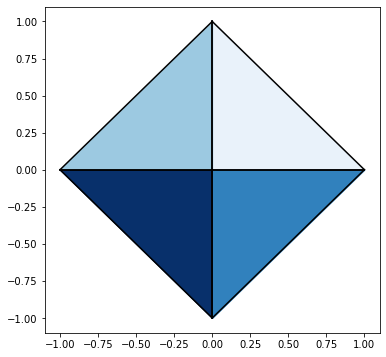

In [109]:
render(octahedron, camera1, light1, lines=black)

((1.0, 0.0, 0.0), 1)


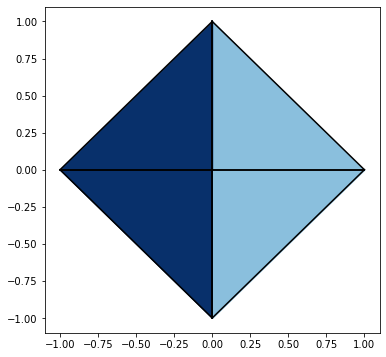

((0.8090169943749475, 0.5877852522924731, 0.0), 1)


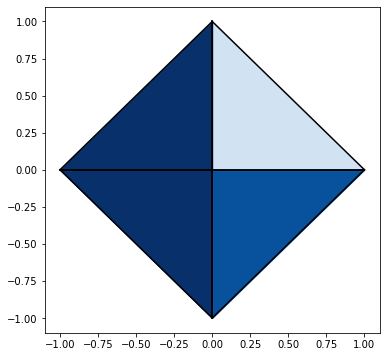

((0.30901699437494745, 0.9510565162951535, 0.0), 1)


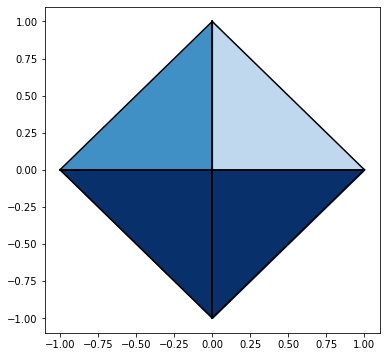

((-0.30901699437494734, 0.9510565162951536, 0.0), 1)


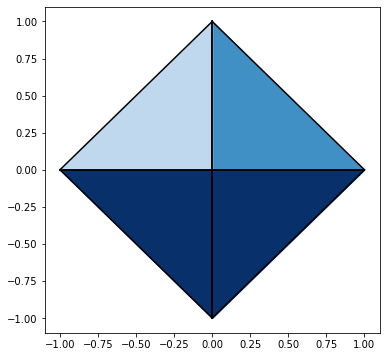

((-0.8090169943749473, 0.5877852522924732, 0.0), 1)


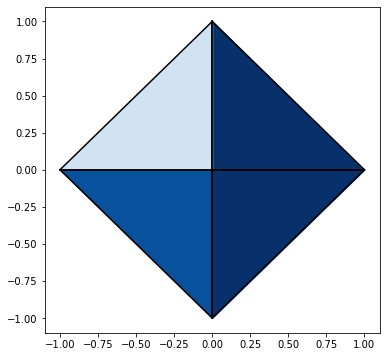

((-1.0, 1.2246467991473532e-16, 0.0), 1)


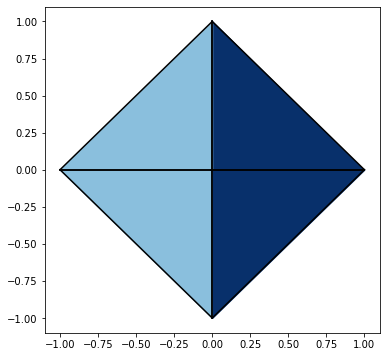

((-0.8090169943749476, -0.587785252292473, 0.0), 1)


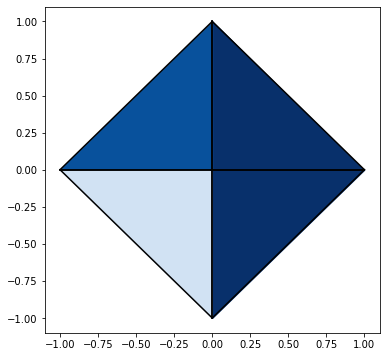

((-0.30901699437494756, -0.9510565162951535, 0.0), 1)


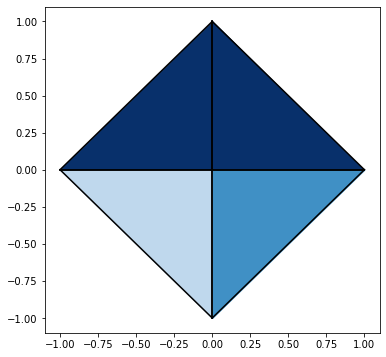

((0.30901699437494723, -0.9510565162951536, 0.0), 1)


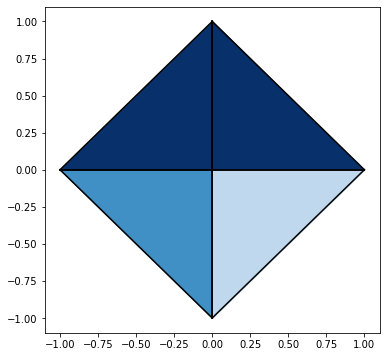

((0.8090169943749473, -0.5877852522924734, 0.0), 1)


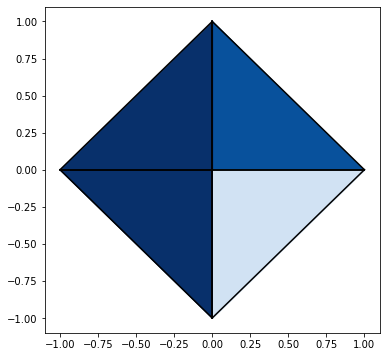

In [110]:
xy = [to_cartesian((1, i/180*pi)) for i in range(0,360)]
light360 = [((x,y,.0), 1) for x,y in xy]

# TODO: Make animation from rotating light
for i in range(0,360, 36):
    print(light360[i])
    render(octahedron, camera1, light360[i], lines=black)

## Subdivide triangle, use same approach as sphere example.

In [111]:
pyramid = [
    [(0,0,0), (1,0,0), (0,1,0)],
    [(1,0,0), (0,1,0), (0,0,1)],
    [(0,1,0), (0,0,0), (0,0,1)],
    [(0,0,0), (1,0,0), (0,0,1)]
]

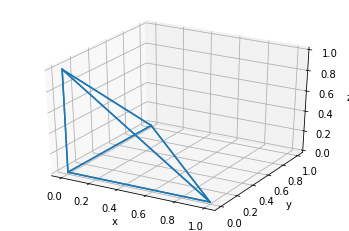

In [112]:
from draw3d import *

polygons = [Polygon3D(*face) for face in pyramid]

draw3d(
    *polygons,
    origin=None, axes=None
)

In [113]:
def face_split(face):
    mid_vertices = [scale(0.5, add(face[i], face[(i+1)%len(face)])) 
                    for i in range(0,len(face))]
    group_vertices = [(face[i], mid_vertices[i], mid_vertices[(i-1)%len(face)]) 
                    for i in range(0,len(face))]
    return [mid_vertices] + group_vertices

In [114]:
face_split(pyramid[0])

[[(0.5, 0.0, 0.0), (0.5, 0.5, 0.0), (0.0, 0.5, 0.0)],
 ((0, 0, 0), (0.5, 0.0, 0.0), (0.0, 0.5, 0.0)),
 ((1, 0, 0), (0.5, 0.5, 0.0), (0.5, 0.0, 0.0)),
 ((0, 1, 0), (0.0, 0.5, 0.0), (0.5, 0.5, 0.0))]

In [115]:
mid_points = [Points3D(*vertex, color=red) 
            for face in pyramid for vertex in face_split(face)]

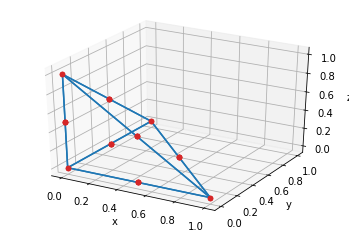

In [116]:
draw3d(
    *polygons,
    *mid_points,
    origin=None, axes=None
)

In [117]:
def rec_face_split(geo, depth=0):
    if depth == 0:
        return geo
    else:
        return rec_face_split(
            [new_face for face in geo for new_face in face_split(face)], depth-1
        )

In [118]:
rec_mid_points = [Points3D(*face, color=red) for face in rec_face_split(pyramid, 2)]


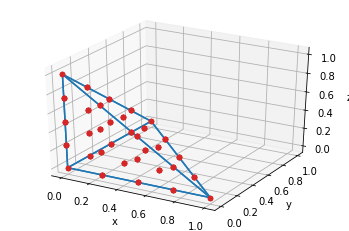

In [119]:
draw3d(
    *polygons,
    *rec_mid_points,
    origin=None, axes=None
)

## Exercises

**Mini project:** Find pairs of vectors defining each of the 12 edges of the octahedron, and draw all of the edges in Python.

In [120]:
octahedron

[[(1, 0, 0), (0, 1, 0), (0, 0, 1)],
 [(1, 0, 0), (0, 0, -1), (0, 1, 0)],
 [(1, 0, 0), (0, 0, 1), (0, -1, 0)],
 [(1, 0, 0), (0, -1, 0), (0, 0, -1)],
 [(-1, 0, 0), (0, 0, 1), (0, 1, 0)],
 [(-1, 0, 0), (0, 1, 0), (0, 0, -1)],
 [(-1, 0, 0), (0, -1, 0), (0, 0, 1)],
 [(-1, 0, 0), (0, 0, -1), (0, -1, 0)]]

In [124]:
polygons = [Polygon3D(*face) for face in octahedron]

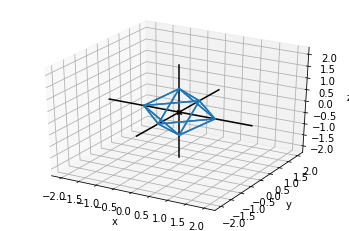

In [125]:
draw3d(
    *polygons
)

In [127]:
segment = [Segment3D(face[i], face[(i+1)%len(face)]) 
            for face in octahedron for i in range(0,len(face))]

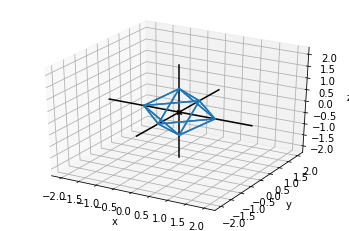

In [128]:
draw3d(
    *segment
)

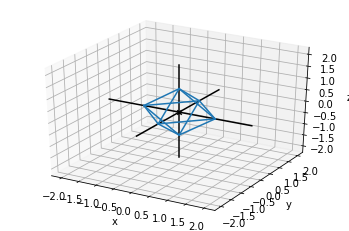

In [129]:
top = (0,0,1)
bottom = (0,0,-1)
xy_plane = [(1,0,0),(0,1,0),(-1,0,0),(0,-1,0)]
edges = [Segment3D(top,p) for p in xy_plane] +\
            [Segment3D(bottom, p) for p in xy_plane] +\
            [Segment3D(xy_plane[i],xy_plane[(i+1)%4]) for i in range(0,4)] 
draw3d(*edges)